# HW 4 -- KMeans -- Layth Aljorani

## Exercise 1

the file hw data.txt contains 25,000 records, each involving three quantities, an index, a height in inches,
and a weight in pounds. We want to select the first 350 records, and plot height versus weight, with the
mean surrounded by three red rings of radius 1, 2 and 3 standard deviations.
Write a program exercise1.py and:

- use np.loadtxt() to read data from hw data.txt;
- use np.shape() to get and print the number of rows and columns;
- print the first five rows of data;
- now reduce data to the first 350 rows, and last two columns of information.
- compute and print min, mean, max, variance, std of data;
- create data2, a standardized copy of data;
- use plt.scatter ( ) to plot values of height (column 0) versus weight (column 1) of your standardized
data;
- add 3 red rings to your plot, of radius 1, 2 and 3 standard deviations:

In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [6]:
data = np.loadtxt("./hw_data.txt") # import data
print(f"shape of data: {np.shape(data)}") # print shape
print(f"first five rows:\n{data[:5]}") # print first 5 rows

shape of data: (25000, 3)
first five rows:
[[  1.       65.78331 112.9925 ]
 [  2.       71.51521 136.4873 ]
 [  3.       69.39874 153.0269 ]
 [  4.       68.2166  142.3354 ]
 [  5.       67.78781 144.2971 ]]


In [7]:
data = data[:350,-2:] # reducing data
print(f"shape of data: {np.shape(data)}")

shape of data: (350, 2)


In [8]:
print(f"Min of data: {np.min(data):.2f}")
print(f"Mean of data: {np.mean(data):.2f}")
print(f"Max of data: {np.max(data):.2f}")
print(f"Variance of data: {np.var(data):.2f}")
print(f"Standarad Deviation of data: {np.std(data):.2f}")

Min of data: 63.19
Mean of data: 97.40
Max of data: 158.96
Variance of data: 941.52
Standarad Deviation of data: 30.68


In [9]:
xs = ((data[:,0] - np.mean(data[:,0])) / np.std(data[:,0])) # standaradize the x
ys = ((data[:,1] - np.mean(data[:,1])) / np.std(data[:,1])) # standaradize the y

# or
std_scaler = StandardScaler().fit(data)
data2 = std_scaler.transform(data)
data2[:5]

array([[-1.14219365, -1.15067636],
       [ 1.87735868,  0.800458  ],
       [ 0.76240693,  2.17399521],
       [ 0.13965818,  1.28611563],
       [-0.08622745,  1.44902574]])

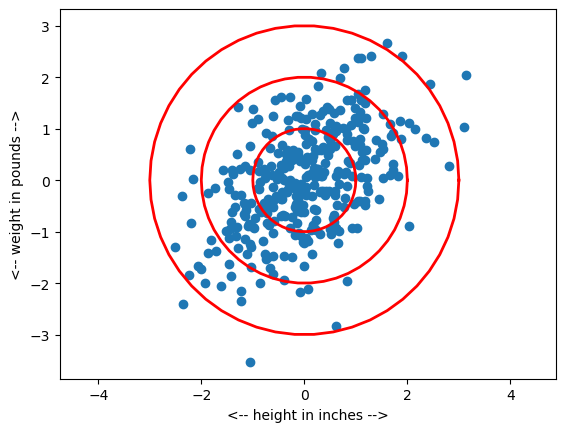

In [10]:
plt.scatter(xs, ys)
t = np.linspace(0, 2 * np.pi, 51) # generate 51 points from 0 to 2pi
x = np.cos(t)
y = np.sin(t)
plt.plot(x, y, 'r-', linewidth = 2)
plt.plot(2.0*x, 2.0*y, 'r-', linewidth = 2)
plt.plot(3.0*x, 3.0*y, 'r-', linewidth = 2)

plt.xlabel("<-- height in inches -->")
plt.ylabel("<-- weight in pounds -->")
plt.axis("equal") # to remove directional bias
plt.savefig('exercise1.jpg')
plt.show()

## Prepare for Exercise 2

We will now read a set of two-dimensional data. We will consider regarding this data as either a single
cluster, or a pair of clusters. We want to compare the energy of the one and two cluster cases.
To split our data into k clusters, we use the implementation of the K Means algorithm available in
scikit-learn.
To use the algorithm, we need the statement

To use the algorithm, we need the statement
- `from sklearn.cluster import KMeans`

if we wish to create k clusters, we must define the word kmeans as follows:
- `kmeans = KMeans(n_clusters=k, n_init='auto')`

to cluster data, we then write
- `kmeans.dfit(data)`:

Following this command, we can collect some information as follows:
- Z = `kmeans.cluster_centers`
- C = `kmeans.labels_`
- E = `kmeans.inertia_`

Here, each of the n values C[i] satisfies 0 ≤ C[i] < k, and indicates that data item i belongs to cluster C[i].
If we wish to plot all the points belonging to cluster 0, we might use a scatter() command like this:

- `plt.scatter(data[C==0, 0], data[C==0, 1], c='red'`

with similar commands to plot points from other clusters, perhaps in blue, green, and so on.
Each cluster has a center. The coordinates of these centers are in the k × d array Z.
It’s important to know how the energy changes as we increase the number of clusters. Therefore, if we want
to compare the energy for the one-cluster and two-cluster cases, then for k = 1 and then k = 2, we have to:
- set k;
- define kmeans;
- apply kmeans() to our data;
- print E=kmeans.inertia ;

This was a lot of preparation, but now we are ready to deal with our tricky two-cluster data from the Old
Faithful geyser.

## Exercise 2

Write a program exercise2.py and:
- use np.loadtxt() to read data from faithful data.txt;
- use np.shape() to get and print the number of rows and columns;
- print the first five rows of data;
- compute and print min, max, mean, variance, std of data;
- create data2, a standardized copy of data;
- use plt.scatter ( x values, y values ) to plot eruption time (column 0) versus wait (column 1);
- apply the KMeans algorithm to data2, requesting k=1 clusters, and print the energy
- apply the KMeans algorithm to data2, requesting k=2 clusters, and print the energy;
- in a scatter plot show cluster C=0, using c = ’red’ and C=1 using c = ’cyan’;
- in the same plot, add the two cluster centers Z, using c = ’black’ and marker = ’*’ for both

You should notice that the energy decreased a lot when we went from k=1 to k=2. In your scatterplot, you
should expect the red and cyan dots to be correctly clustered around a cluster center.
Turn in: a copy of your final plot, exercise2.jpg.

In [16]:
from sklearn.cluster import KMeans

In [17]:
data = np.loadtxt("./faithful_data.txt")
print(f"shape of data: {np.shape(data)}")
print(f"First five rows:\n{data[:5]}")

shape of data: (272, 2)
First five rows:
[[ 3.6   79.   ]
 [ 1.8   54.   ]
 [ 3.333 74.   ]
 [ 2.283 62.   ]
 [ 4.533 85.   ]]


In [18]:
print(f"Min of data: {np.min(data):.2f}")
print(f"Mean of data: {np.mean(data):.2f}")
print(f"Max of data: {np.max(data):.2f}")
print(f"Variance of data: {np.var(data):.2f}")
print(f"Standarad Deviation of data: {np.std(data):.2f}")

Min of data: 1.60
Mean of data: 37.19
Max of data: 96.00
Variance of data: 1228.72
Standarad Deviation of data: 35.05


In [19]:
# standardize the data
std_scaler = StandardScaler().fit(data)
data2 = std_scaler.transform(data)
data2[:5]

array([[ 0.09849886,  0.59712344],
       [-1.48145856, -1.24518118],
       [-0.13586149,  0.22866251],
       [-1.05750332, -0.6556437 ],
       [ 0.91744345,  1.03927655]])

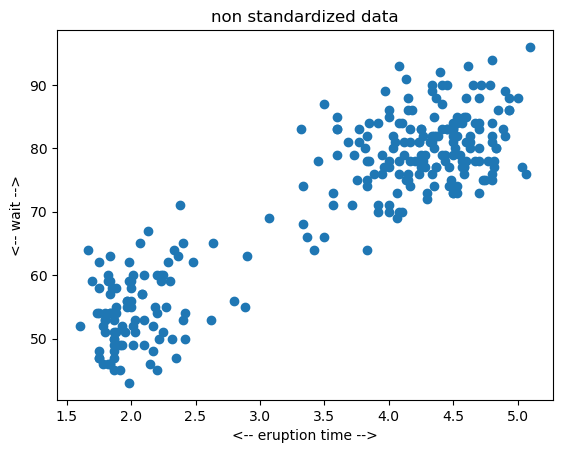

In [20]:
plt.scatter(data[:,0], data[:,1])
plt.title("non standardized data")
plt.xlabel("<-- eruption time -->")
plt.ylabel("<-- wait -->")
plt.show()

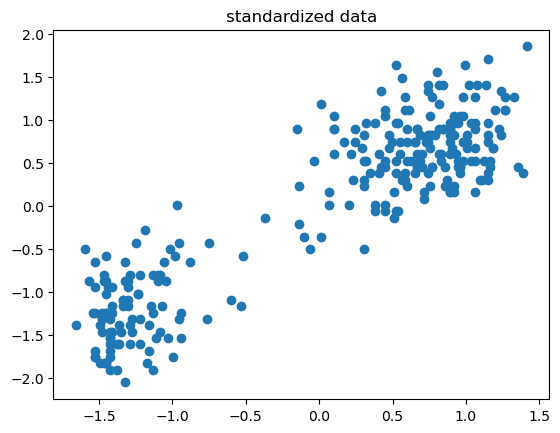

In [21]:
plt.scatter(data2[:,0], data2[:,1])
plt.title("standardized data")
plt.show()

In [22]:
ks = [1, 2] # easily scale your k
k_dict = {} # {k: (Z,C)}
for k in ks:
    kmeans = KMeans(n_clusters=k, n_init='auto') # create a kmeans
    kmeans.fit(data2) # fit it on standardized data
    
    # fetch and save properties
    Z = kmeans.cluster_centers_
    C = kmeans.labels_
    E = kmeans.inertia_
    k_dict[k] = (Z,C)
    
    print(f"@ K= {k}; Energy= {E:.2f}")

@ K= 1; Energy= 544.00
@ K= 2; Energy= 79.58


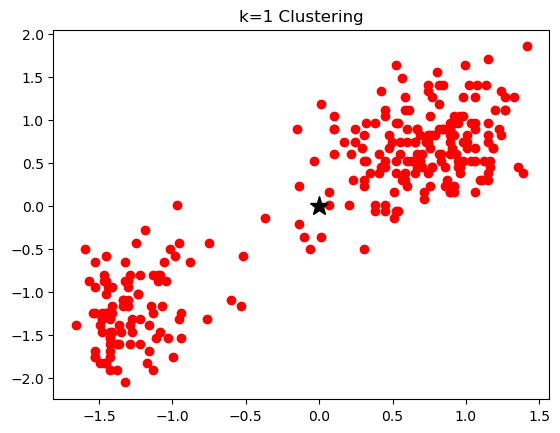

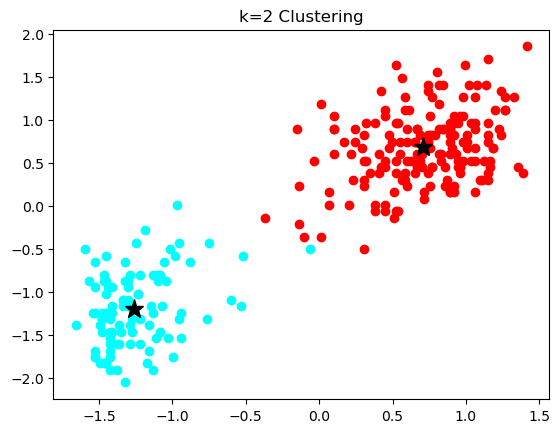

In [23]:
for key, value in k_dict.items():
    Z = value[0] # k=1 ; index 0 (Z,C) ; center coordinates
    C = value[1] # k=1 ; index 1 (Z,C) ; labels
    colors = ['red', 'cyan', 'magenta', 'yellow'] # NOTE: len(colors) >= k
    for i in range(key):
        plt.scatter(data2[C==i, 0], data2[C==i, 1], c=colors[i % len(colors)])

    for capital in Z: # print capital of cluster in a black star (k*)
        plt.plot(capital[0], capital[1], 'k*', markersize=14)
    
    # titles
    plt.title(f"k={key} Clustering")
    if key == 2: plt.savefig('exercise2.jpg')
    plt.show()

## Exercise 3

The Ruspini data naturally breaks into a number of clusters. We will use KMeans to cluster the data into
1 ≤ k ≤ 10 clusters, compute the energy each time, and plot the sequence of energy values, looking for a
sort of “elbow” or “hockey stick” in the plot, which suggests a natural value of k to choose.

Write a program explore.py which searches for a good value of k:
- use np.loadtxt() to read data from ruspini data.txt;
- use np.shape() to get and print the number of rows and columns;
- print the first five rows of data;
- create data2, a standardized copy of data;
- use plt.scatter ( x values, y values ) to plot x (column 0) versus y (column 1);
- for 1 ≤ k ≤ 10, set up kmeans, cluster the data, store E[k-1]=kmeans.inertia ;
- print the values k,E[k-1];
- plot the values k,E[k-1];

Write a second program exercise3.py which uses your chosen value of k:
- based on your energy plot, choose a value of k;
- using your chosen value of k, define kmeans, use kmeans() to cluster data2;
- in a scatter plot, display each set of clustered data;
- in the same scatter plot, add the cluster centers, using c = ’black’ and marker = ’*’

If you have chosen k well, your plot should show nicely clustered data.

Turn in: a copy of your final plot, exercise3.jpg.

### Exploring

In [27]:
data = np.loadtxt("./ruspini_data.txt")
print(f"shape of data: {np.shape(data)}")
print(f"First five rows:\n{data[:5]}")
print(f"Min of data: {np.min(data):.2f}")
print(f"Mean of data: {np.mean(data):.2f}")
print(f"Max of data: {np.max(data):.2f}")
print(f"Variance of data: {np.var(data):.2f}")
print(f"Standarad Deviation of data: {np.std(data):.2f}")

shape of data: (75, 2)
First five rows:
[[ 4. 53.]
 [ 5. 63.]
 [10. 59.]
 [ 9. 77.]
 [13. 49.]]
Min of data: 4.00
Mean of data: 73.45
Max of data: 156.00
Variance of data: 1974.13
Standarad Deviation of data: 44.43


In [28]:
# standardize the data
std_scaler = StandardScaler().fit(data)
data2 = std_scaler.transform(data)
data2[:5]

array([[-1.67929121, -0.806722  ],
       [-1.64628627, -0.60001155],
       [-1.48126158, -0.68269573],
       [-1.51426652, -0.31061691],
       [-1.38224677, -0.88940619]])

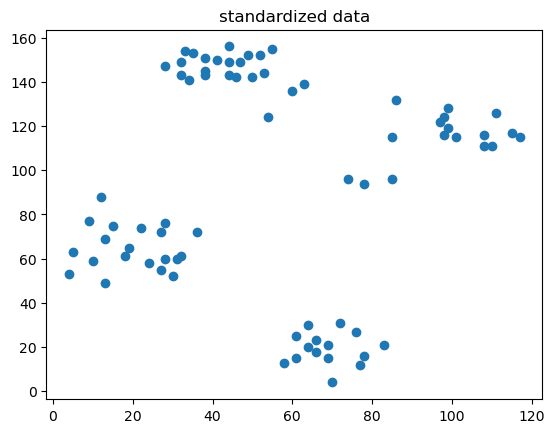

In [29]:
plt.scatter(data[:,0], data[:,1])
plt.title("standardized data")
plt.show()

@ K= 1; Energy= 244373.87
@ K= 2; Energy= 89337.83
@ K= 3; Energy= 51155.41
@ K= 4; Energy= 12881.05
@ K= 5; Energy= 10126.72
@ K= 6; Energy= 9158.73
@ K= 7; Energy= 8988.05
@ K= 8; Energy= 6351.22
@ K= 9; Energy= 6875.27
@ K= 10; Energy= 5096.64


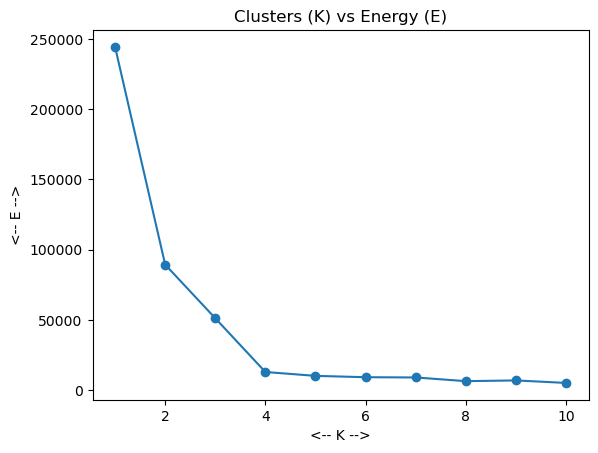

In [30]:
ks = range(1,11) # easily scale your k
k_dict = {} # {k: (Z,C}}
Energy = np.zeros(len(ks)) # init to zeros
for k in ks:
    kmeans = KMeans(n_clusters=k, n_init='auto') # create a kmeans
    kmeans.fit(data) # fit it on raw data
    
    # fetch and save properties
    Z = kmeans.cluster_centers_
    C = kmeans.labels_
    E = kmeans.inertia_
    k_dict[k] = (Z,C,E)
    Energy[k - 1] = E
    
    print(f"@ K= {k}; Energy= {E:.2f}")

plt.plot(ks, Energy, marker='o')
plt.title("Clusters (K) vs Energy (E)")
plt.xlabel("<-- K -->")
plt.ylabel("<-- E -->")
plt.show()

Not sure if the section above wanted raw data or standardized data, but I decided to use raw since the next section uses standardized

### Main

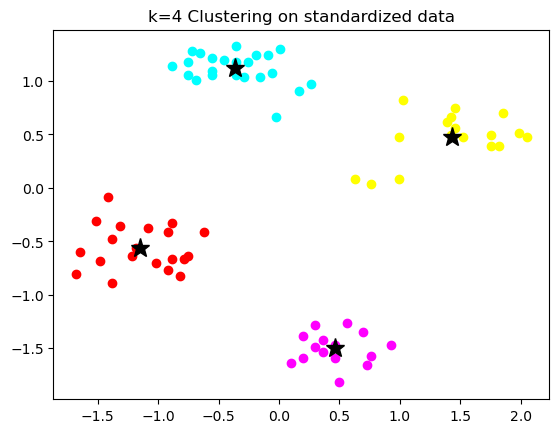

In [33]:
k = 4
kmeans = KMeans(n_clusters=k, n_init='auto') # create a kmeans
kmeans.fit(data2) # fit it on standardized data

Z = kmeans.cluster_centers_
C = kmeans.labels_
E = kmeans.inertia_

colors = ['red', 'cyan', 'magenta', 'yellow'] # NOTE: len(colors) >= k
for i in range(k):
    plt.scatter(data2[C==i, 0], data2[C==i, 1], c=colors[i % len(colors)])
    
for capital in Z: # print capital of cluster in a black star (k*)
    plt.plot(capital[0], capital[1], 'k*', markersize=14)
    
# titles
plt.title(f"k={k} Clustering on standardized data")
plt.savefig('exercise3.jpg')
plt.show()

## Prepare for Exercise 4

## Exercise 4

In [36]:
import imageio.v2 as imageio

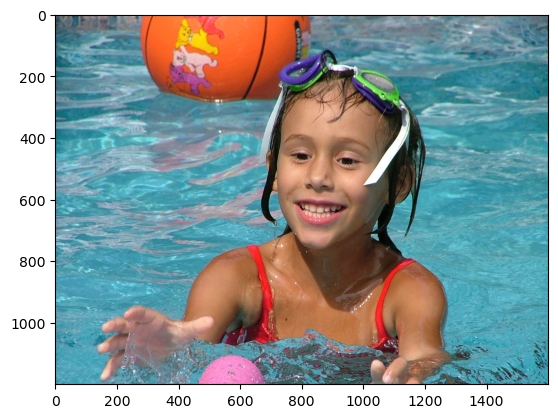

In [37]:
image = imageio.imread("./swim.jpg") # W x H x D (where D is 3)
plt.imshow(image)
plt.show()

The image currently is represented by unsigned 8 bit integers. We want to convert this to floating point
numbers between 0 and 1:

In [39]:
image = np.array(image, dtype=np.float64) / 255 # where 255 is the max color value (0, 255)
print(f"shape: {np.shape(image)}")
print(f"first 3 elements: \n {image[:3]}")

shape: (1200, 1600, 3)
first 3 elements: 
 [[[0.35294118 0.39607843 0.36470588]
  [0.41568627 0.43921569 0.42352941]
  [0.45490196 0.45490196 0.44705882]
  ...
  [0.34901961 0.37647059 0.41568627]
  [0.36862745 0.39607843 0.43529412]
  [0.38823529 0.41176471 0.45882353]]

 [[0.36470588 0.41568627 0.38039216]
  [0.41960784 0.45882353 0.42745098]
  [0.45882353 0.45882353 0.45098039]
  ...
  [0.32941176 0.36862745 0.40784314]
  [0.3372549  0.37647059 0.41568627]
  [0.3372549  0.38823529 0.42352941]]

 [[0.37254902 0.42352941 0.38823529]
  [0.41960784 0.45882353 0.42745098]
  [0.45882353 0.45882353 0.45098039]
  ...
  [0.30196078 0.37254902 0.41176471]
  [0.29803922 0.37647059 0.41176471]
  [0.29803922 0.37647059 0.41176471]]]


The kmeans() code expects to work on an array with two dimensions, but our image data is in 3D. We
need to reshape the array so that all the pixel data is in the first dimension. we must reshape the array so it
looks like a 2-dimensional numpy array that kmeans() can handle:

In [41]:
w = np.shape(image)[0]
h = np.shape(image)[1]
d = np.shape(image)[2]
image2 = np.reshape(image, (w*h, d))
print(f"new shape: {np.shape(image2)}")

new shape: (1920000, 3)


I will, first, test which K value to choose.

@ K= 1; Energy= 237514.96
@ K= 2; Energy= 126206.05
@ K= 3; Energy= 78039.21
@ K= 4; Energy= 60442.94
@ K= 5; Energy= 52472.21
@ K= 6; Energy= 42572.81
@ K= 7; Energy= 37772.11
@ K= 8; Energy= 32366.18
@ K= 9; Energy= 29478.94
@ K= 10; Energy= 26520.38


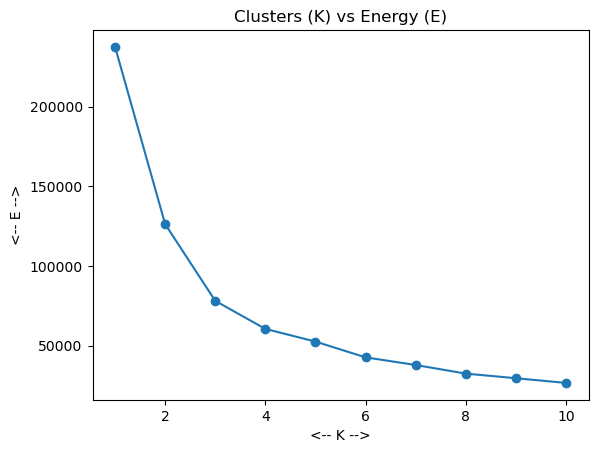

In [43]:
ks = range(1,11) # easily scale your k
k_dict = {} # {k: (Z,C}}
Energy = np.zeros(len(ks)) # init to zeros
for k in ks:
    kmeans = KMeans(n_clusters=k, n_init='auto') # create a kmeans
    kmeans.fit(image2) # fit it on reshaped image
    
    # fetch and save properties
    Z = kmeans.cluster_centers_
    C = kmeans.labels_
    E = kmeans.inertia_
    k_dict[k] = (Z,C,E)
    Energy[k - 1] = E
    
    print(f"@ K= {k}; Energy= {E:.2f}")

plt.plot(ks, Energy, marker='o')
plt.title("Clusters (K) vs Energy (E)")
plt.xlabel("<-- K -->")
plt.ylabel("<-- E -->")
plt.show()

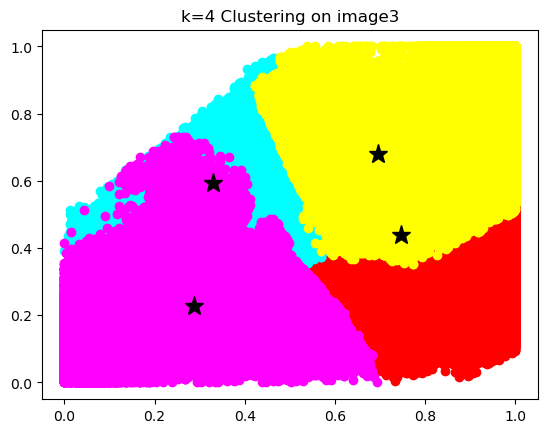

In [44]:
k = 4
kmeans = KMeans(n_clusters=k, n_init='auto') # create a kmeans
kmeans.fit(image2) # fit it on reshaped image
Z = kmeans.cluster_centers_
C = kmeans.labels_

colors = ['red', 'cyan', 'magenta', 'yellow'] # NOTE: len(colors) >= k
for i in range(k):
    plt.scatter(image2[C==i, 0], image2[C==i, 1], c=colors[i % len(colors)])
    
for capital in Z: # print capital of cluster in a black star (k*)
    plt.plot(capital[0], capital[1], 'k*', markersize=14)
    
# titles
plt.title(f"k={k} Clustering on image3")
plt.show()

# A hot mess

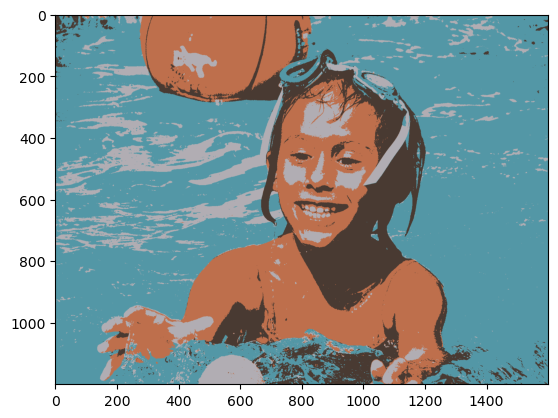

In [45]:
image3 = Z[C]  # Replace every color by its 'center'
image3 = image3.reshape(w,h,d) # restore original image shape

plt.imshow(image3)
plt.show()

You can peek at the result using the imshow() and show() commands.

In [47]:
image3 = np.array(255 * image3, dtype=np.uint8)
imageio.imwrite('exercise4.jpg', image3)